In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

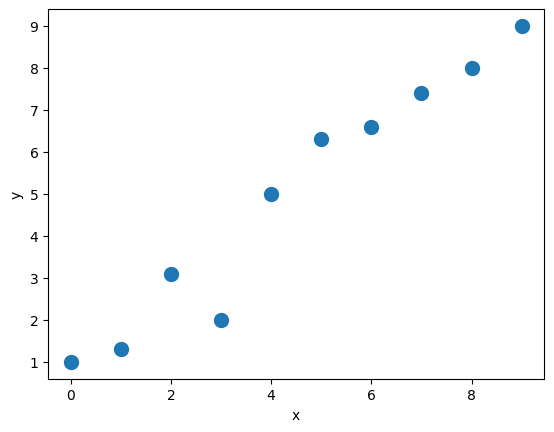

In [48]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [49]:
from torch.utils.data import TensorDataset, DataLoader
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size=1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [4]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [5]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward() # ?1 ok
    with torch.no_grad(): # ?2 ok
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 46.5720
Epoch 10 Loss 27.1502
Epoch 20 Loss 1.6446
Epoch 30 Loss 14.4571
Epoch 40 Loss 11.7827
Epoch 50 Loss 6.4122
Epoch 60 Loss 0.6339
Epoch 70 Loss 3.1562
Epoch 80 Loss 2.0100
Epoch 90 Loss 0.3107
Epoch 100 Loss 0.7625
Epoch 110 Loss 1.0024
Epoch 120 Loss 0.0232
Epoch 130 Loss 0.5138
Epoch 140 Loss 0.0741
Epoch 150 Loss 1.8712
Epoch 160 Loss 0.0007
Epoch 170 Loss 0.0850
Epoch 180 Loss 0.0634
Epoch 190 Loss 0.0012


In [6]:
print(f'Final Parameters:', weight.item(), bias.item())

Final Parameters: 2.670930862426758 4.88258695602417


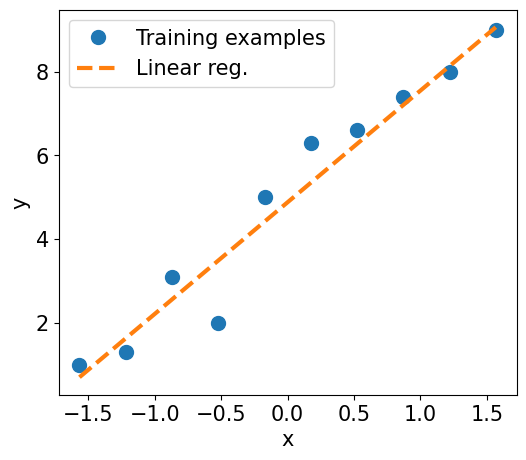

In [7]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy() # ?1: detach() ok
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15) # ?2: which='major' ok
plt.show()

In [ ]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean') # ?1: reduction='mean' ok
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0] # ?1 [:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():4f}')

Epoch 0 Loss 24.668407
Epoch 10 Loss 29.137701
Epoch 20 Loss 20.920650
Epoch 30 Loss 0.125729
Epoch 40 Loss 12.492172
Epoch 50 Loss 1.784494
Epoch 60 Loss 7.642506
Epoch 70 Loss 2.560648
Epoch 80 Loss 0.015652
Epoch 90 Loss 0.754788
Epoch 100 Loss 0.841207
Epoch 110 Loss 0.492312
Epoch 120 Loss 0.082327
Epoch 130 Loss 0.079431
Epoch 140 Loss 0.089054
Epoch 150 Loss 0.097289
Epoch 160 Loss 0.104313
Epoch 170 Loss 0.110342
Epoch 180 Loss 0.000948
Epoch 190 Loss 0.076359


In [10]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6496422290802 4.87706995010376


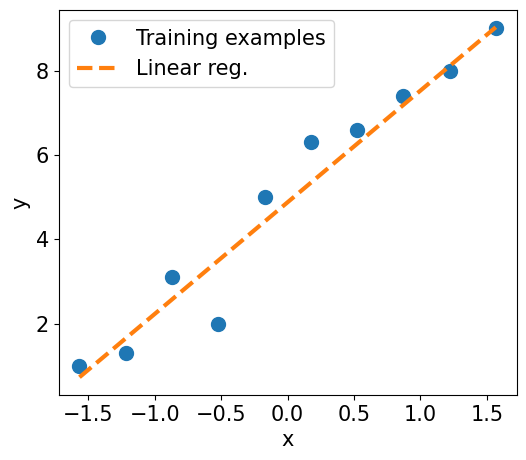

In [11]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy() # ?1: detach() ok
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15) # ?2: which='major' ok
plt.show()

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [13]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [14]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [15]:
input_size=X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [16]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

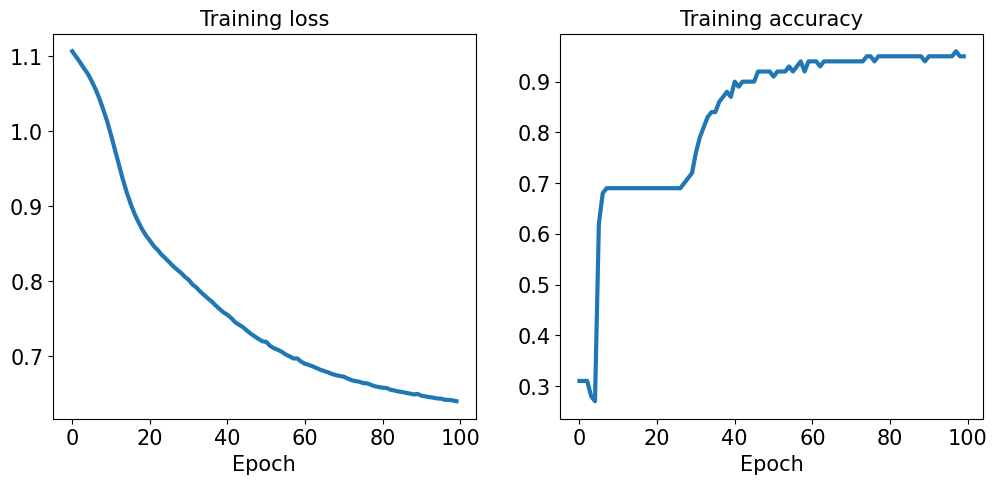

In [17]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [18]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [ ]:
path = 'models/iris_classifier.pt'
torch.save(model, path)

In [23]:
model_new = torch.load(path, weights_only=False)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [24]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [25]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [26]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

In [28]:
import numpy as np
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)
print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [29]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input:\n', Z)
print('Output Units:\n', y_probas)

Net Input:
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


In [30]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: ', y_class)

Predicted class label:  0


In [31]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))
y_probas = softmax(Z)
print('Probabilities:\n', y_probas)
np.sum(y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


np.float64(1.0)

In [32]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

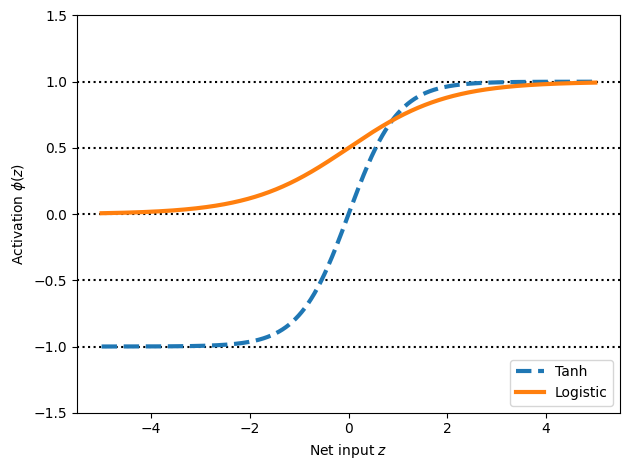

In [40]:
import matplotlib.pyplot as plt
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel(r'Net input $z$')
plt.ylabel(r'Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act, linewidth=3, linestyle='--', label='Tanh')
plt.plot(z, log_act, linewidth=3, label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

In [41]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829], shape=(2000,))

In [42]:
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [43]:
from scipy.special import expit
expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383], shape=(2000,))

In [44]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

In [45]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)